In [1]:
# Import packages
import pandas as pd
import matplotlib
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import datetime

In [95]:
# Load data and sort features
df_raw = pd.read_csv('/Users/frankdezwart/code/kaggle_house_prices/data/raw/train.csv')

list_continuous = ['LotFrontage', 'LotArea', 'MasVnrArea',
                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                   'LowQualFinSF', 'GrLivArea', 'GarageArea',
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea',
                   'MiscVal']
list_categorical = ['MSSubClass', 'MSZoning', 'Street',
                    'Alley', 'LotShape', 'LandContour',
                    'Utilities', 'LotConfig', 'LandSlope',
                    'Neighborhood', 'Condition1', 'Condition2',
                    'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd',
                    'MasVnrType', 'BedroomAbvGr', 'KitchenAbvGr',
                    'Foundation', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2',
                    'Heating', 'CentralAir', 'Electrical',
                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                    'HalfBath',
                    'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                    'GarageType', 'GarageFinish', 'GarageCars',
                    'PavedDrive', 'Fence', 'MiscFeature',
                    'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition']
list_ordinal = ['OverallQual', 'OverallCond', 'ExterQual',
                'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual',
                'FireplaceQu', 'GarageQual', 'GarageCond',
                'PoolQC']
list_date = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
target = 'SalePrice'

# Check if no column is missing
list_total = list_continuous + list_categorical + list_ordinal + list_date
# print(df_raw.loc[:,~df_raw.columns.isin(list_total)])
# Check for duplicates in lists
# set([x for x in list_total if list_total.count(x) > 1])

In [9]:
# Functions
def replace_nan(df_raw, column_list, replacement):
    """
    Replaces the NaN values in a Pandas dataframe
    :param df: Input Pandas dataframe with NaN's
    :param column_list: List with selection of features
    :param replacement: Value that is used to replace NaN's
    :return: Dataframe with replaced NaN's
    """
    return df_raw.loc[:, column_list].fillna(replacement)

In [97]:
# Process the raw data
# Replace NaN values by either 0 or 'none' based on the datatype
df_cont_numeric = replace_nan(df_raw, list_continuous, 0)
df_cat_raw = replace_nan(df_raw, list_categorical, 'None')
df_ord_raw = replace_nan(df_raw, list_ordinal, 0)
# Set NaN year values to the current year to set age to 0
df_date_numeric = replace_nan(df_raw, list_date, datetime.date.today().year)

# Convert ordinal values to numeric values
# Poor | Fair | Average | Good | Excellent
dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5}
df_ord_numeric = pd.DataFrame(columns=df_ord_raw.columns)
for column in df_ord_raw.columns:
    df_ord_numeric[column] = df_ord_raw[column].map(dict).fillna(df_ord_raw[column])
    
# Convert the year values to age
    
# Use standard scaler to standardize the continuous and ordinal features
continuous_scaled = StandardScaler().fit_transform(df_cont_numeric)
ordinal_scaled = StandardScaler().fit_transform(df_ord_numeric)

# Convert the results to a Pandas dataframe
df_cont_scaled = pd.DataFrame(data=continuous_scaled,
                              index=df_cont_numeric.index,
                              columns=df_cont_numeric.columns)
df_ord_scaled = pd.DataFrame(data=ordinal_scaled,
                             index=df_ord_numeric.index,
                             columns=df_ord_numeric.columns)

# Convert the categorical features to dummies
df_cat_dummy = pd.get_dummies(df_cat_raw, columns=df_cat_raw.columns, drop_first=True)

# Concatenate all columns in one processed df_train 
df_train_processed = pd.concat([df_cont_scaled, df_ord_scaled,
                                df_cat_dummy, df_raw.loc[:,target]],
                               axis=1)

In [101]:
len(df_cat_raw.columns)

45

In [102]:
print(df_train_processed.Id)

AttributeError: 'DataFrame' object has no attribute 'Id'

In [89]:
print(df_date_numeric)
# print(df_raw[list_date].head(10))

      YearBuilt  YearRemodAdd  GarageYrBlt
0            16            16         16.0
1            43            43         43.0
2            18            17         18.0
3           104            49         21.0
4            19            19         19.0
5            26            24         26.0
6            15            14         15.0
7            46            46         46.0
8            88            69         88.0
9            80            69         80.0
10           54            54         54.0
11           14            13         14.0
12           57            57         57.0
13           13            12         13.0
14           59            59         59.0
15           90            18         28.0
16           49            49         49.0
17           52            52         52.0
18           15            15         15.0
19           61            54         61.0
20           14            13         14.0
21           89            69         89.0
22         

In [83]:
print(df_train_processed.head(10))

   LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     0.212877 -0.207142    0.514104    0.575425   -0.288653  -0.944591   
1     0.645747 -0.091886   -0.570750    1.171992   -0.288653  -0.641228   
2     0.299451  0.073480    0.325915    0.092907   -0.288653  -0.301643   
3     0.068587 -0.096897   -0.570750   -0.499274   -0.288653  -0.061670   
4     0.761179  0.375148    1.366489    0.463568   -0.288653  -0.174865   
5     0.790037  0.360616   -0.570750    0.632450   -0.288653  -1.139286   
6     0.501457 -0.043379    0.458754    2.029558   -0.288653  -0.566519   
7    -1.662893 -0.013513    0.757643    0.910994   -0.090220  -0.795173   
8    -0.191135 -0.440659   -0.570750   -0.973018   -0.288653   0.871057   
9    -0.219993 -0.310370   -0.570750    0.893448   -0.288653  -0.967230   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
0    -0.459303 -0.793434  1.161852     -0.120242  ...               0   
1     0.466465  0.257140 -0.

In [22]:
# Warnings from profile report
# Continuous features:
"""
2ndFlrSF has 829 / 56.8% zeros Zeros
3SsnPorch has 1436 / 98.4% zeros Zeros
BsmtFinSF1 has 467 / 32.0% zeros Zeros
BsmtFinSF2 has 1293 / 88.6% zeros Zeros
BsmtUnfSF has 118 / 8.1% zeros Zeros
EnclosedPorch has 1252 / 85.8% zeros Zeros
GarageArea has 81 / 5.5% zeros Zeros
LotFrontage has 259 / 17.7% zeros Zeros
LowQualFinSF has 1434 / 98.2% zeros Zeros
MasVnrArea has 869 / 59.5% zeros Zeros
MiscVal has 1408 / 96.4% zeros Zeros
MiscVal is highly skewed (γ1 = 24.477) Skewed
OpenPorchSF has 656 / 44.9% zeros Zeros
PoolArea has 1453 / 99.5% zeros Zeros
ScreenPorch has 1344 / 92.1% zeros Zeros
TotalBsmtSF has 37 / 2.5% zeros Zeros
WoodDeckSF has 761 / 52.1% zeros Zeros
Dataset has 6 duplicate rows Warning
"""
# Categorical features:
"""
BsmtFullBath has 856 / 58.6% zeros Zeros
BsmtHalfBath has 1378 / 94.4% zeros Zeros
Fireplaces has 690 / 47.3% zeros Zeros
GarageCars has 81 / 5.5% zeros Zeros
HalfBath has 913 / 62.5% zeros Zeros
"""
# Ordinal features: -> Ignore GarageCond from futher analysis
"""
BsmtCond has 37 / 2.5% zeros Zeros
BsmtQual has 37 / 2.5% zeros Zeros
FireplaceQu has 690 / 47.3% zeros Zeros
GarageCond is highly correlated with GarageQual (ρ = 0.95917) Rejected
GarageQual has 81 / 5.5% zeros Zeros
PoolQC has 1453 / 99.5% zeros Zeros
Dataset has 703 duplicate rows Warning
"""

'\nBsmtCond has 37 / 2.5% zeros Zeros\nBsmtQual has 37 / 2.5% zeros Zeros\nFireplaceQu has 690 / 47.3% zeros Zeros\nGarageCond is highly correlated with GarageQual (ρ = 0.95917) Rejected\nGarageQual has 81 / 5.5% zeros Zeros\nPoolQC has 1453 / 99.5% zeros Zeros\nDataset has 703 duplicate rows Warning\n'

In [21]:
pandas_profiling.ProfileReport(df_categorical)

Number of variables,46
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,524.8 KiB
Average record size in memory,368.1 B
Numeric,13
Categorical,33
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [2]:
df_train = pd.read_csv('/Users/frankdezwart/code/kaggle_house_prices/data/processed/train.csv')

In [3]:
print(df_train.head(5))

   Unnamed: 0  Id  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           0   1     0.212877 -0.207142     0.651479    -0.517200       2003   
1           1   2     0.645747 -0.091886    -0.071836     2.179628       1976   
2           2   3     0.299451  0.073480     0.651479    -0.517200       2001   
3           3   4     0.068587 -0.096897     0.651479    -0.517200       1915   
4           4   5     0.761179  0.375148     1.374795    -0.517200       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ...  YrSold_2009  YrSold_2010  \
0          2003    0.514104   1.052302  ...            0            0   
1          1976   -0.570750  -0.689604  ...            0            0   
2          2002    0.325915   1.052302  ...            0            0   
3          1970   -0.570750  -0.689604  ...            0            0   
4          2000    1.366489   1.052302  ...            0            0   

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_Co

In [7]:
list_continuous = ['LotFrontage', 'LotArea',
                        'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', '1stFlrSF',
                        '2ndFlrSF', 'LowQualFinSF',
                        'GrLivArea', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF',
                        'EnclosedPorch', '3SsnPorch',
                        'ScreenPorch', 'PoolArea',
                        'MiscVal']

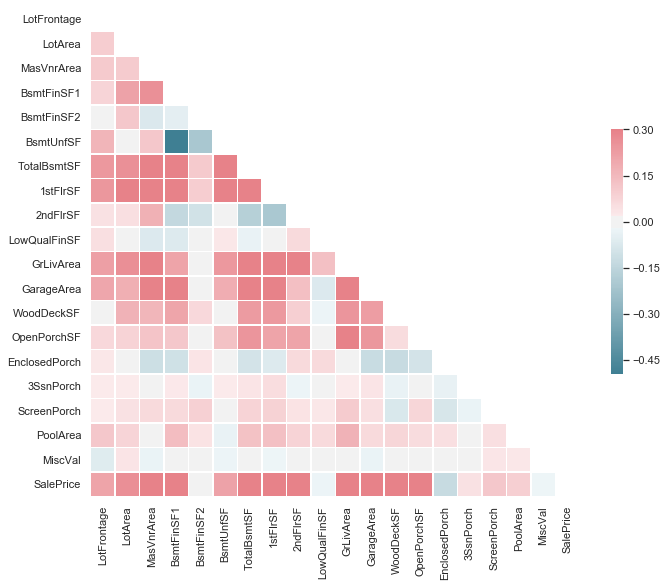

In [13]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df_train.loc[:,list_continuous + ['SalePrice']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
df_train.loc[:,'SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64